# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [1]:
import pandas as pd

In [2]:
from _conf import EXTENDED_BASELINE_DATA, PREPROCESSED_RESULTS

samplns_data = pd.read_json(PREPROCESSED_RESULTS)

baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)

In [3]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
# best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1872
8,FameDB,8
9,FeatureIDE,7


In [4]:
# Fetch external lower bounds, that might be better than the ones we have.
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,9,8.0
7,EMBToolkit,1872,1872.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [5]:
samplns_data = samplns_data[
    [
        "instance_name",
        "lower_bound",
        "upper_bound",
        "baseline_alg",
        "baseline_alg_conf",
        "baseline_sample_size",
    ]
]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["baseline_gap"] = 100 * (
    samplns_data["baseline_sample_size"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby(["instance_name", "baseline_alg", "baseline_alg_conf"])[
    ["lower_bound", "upper_bound", "gap"]
].mean()

lower_bound  \
instance_name              baseline_alg baseline_alg_conf                
APL                        FIDE-ICPL    t2                         7.0   
                           FIDE-YASA    t2_m10_null                7.0   
                                        t2_m1_null                 7.0   
                           Incling      t2                         7.0   
APL-Model                  FIDE-ICPL    t2                         8.0   
...                                                                ...   
uclibc_2008-06-05_13-46-47 Incling      t2                       504.6   
uclibc_2020-12-24_11-54-53 FIDE-ICPL    t2                       365.0   
                           FIDE-YASA    t2_m10_null              365.0   
                                        t2_m1_null               364.4   
                           Incling      t2                       365.0   

                                                           upper_bound  \
instance_name              baseline_alg baseline_alg_conf                
APL                        FIDE-ICPL    t2                         7.0   
                           FIDE-YASA    t2_m10_null                7.0   
                                        t2_m1_null                 7.0   
                           Incling      t2                         7.0   
APL-Model                  FIDE-ICPL    t2                         8.0   
...                                                                ...   
uclibc_2008-06-05_13-46-47 Incling      t2                       507.8   
uclibc_2020-12-24_11-54-53 FIDE-ICPL    t2                       365.0   
                           FIDE-YASA    t2_m10_null              365.0   
                                        t2_m1_null               365.0   
                           Incling      t2                       365.2   

                                                                gap  
instance_name              baseline_alg baseline_alg_conf            
APL                        FIDE-ICPL    t2                 0.000000  
                           FIDE-YASA    t2_m10_null        0.000000  
                                        t2_m1_null         0.000000  
                           Incling      t2                 0.000000  
APL-Model                  FIDE-ICPL    t2                 0.000000  
...                                                             ...  
uclibc_2008-06-05_13-46-47 Incling      t2                 0.554455  
uclibc_2020-12-24_11-54-53 FIDE-ICPL    t2                 0.000000  
                           FIDE-YASA    t2_m10_null        0.000000  
                                        t2_m1_null         0.000000  
                           Incling      t2                 0.054795  

[182 rows x 3 columns]

In [6]:
samplns_data[samplns_data["gap"] > 70]

,instance_name,lower_bound,upper_bound,baseline_alg,baseline_alg_conf,baseline_sample_size,best_lower_bound,internal_best,gap,baseline_gap,algorithm_name
560,toybox_2020-12-06_00-02-46,7,14,FIDE-ICPL,t2,41,8,7.0,75.000000,412.500000,SampLNS
562,toybox_2020-12-06_00-02-46,7,14,FIDE-ICPL,t2,41,8,7.0,75.000000,412.500000,SampLNS
563,toybox_2020-12-06_00-02-46,7,14,FIDE-ICPL,t2,41,8,7.0,75.000000,412.500000,SampLNS
564,toybox_2020-12-06_00-02-46,7,14,FIDE-ICPL,t2,41,8,7.0,75.000000,412.500000,SampLNS
565,toybox_2020-12-06_00-02-46,7,14,Incling,t2,29,8,7.0,75.000000,262.500000,SampLNS
566,toybox_2020-12-06_00-02-46,7,14,Incling,t2,29,8,7.0,75.000000,262.500000,SampLNS
567,toybox_2020-12-06_00-02-46,7,14,Incling,t2,29,8,7.0,75.000000,262.500000,SampLNS
568,toybox_2020-12-06_00-02-46,7,14,Incling,t2,29,8,7.0,75.000000,262.500000,SampLNS
569,toybox_2020-12-06_00-02-46,7,14,Incling,t2,29,8,7.0,75.000000,262.500000,SampLNS
571,toybox_2020-12-06_00-02-46,7,14,FIDE-YASA,t2_m1_null,19,8,7.0,75.000000,137.500000,SampLNS


In [7]:
samplns_data.groupby(["baseline_alg", "baseline_alg_conf"])[["gap"]].mean()

gap
baseline_alg baseline_alg_conf           
FIDE-ICPL    t2                 16.026885
FIDE-YASA    t2_m10_null        14.579612
             t2_m1_null         14.751039
Incling      t2                 16.861322

In [8]:
def initial_sample_name(row):
    baseline_alg = row["baseline_alg"]
    if baseline_alg == "FIDE-YASA":
        baseline_alg = baseline_alg[5:]
        m = row["baseline_alg_conf"].split("_")[1][1:]
        return f"{baseline_alg} (m={m})"
    else:
        if baseline_alg.startswith("FIDE"):
            baseline_alg = baseline_alg[5:]
        return f"{baseline_alg}"


samplns_data["initial_sample_name"] = samplns_data.apply(initial_sample_name, axis=1)
samplns_data.groupby(["initial_sample_name", "instance_name"])[
    ["gap"]
].mean().reset_index().groupby(["initial_sample_name"])[["gap"]].mean()

,gap
initial_sample_name,
ICPL,16.026885
Incling,16.861322
YASA (m=1),14.751039
YASA (m=10),14.579612


In [9]:
samplns_data.groupby(["instance_name"])[["gap"]].mean()

,gap
instance_name,
APL,0.000000
APL-Model,0.000000
BankingSoftware,0.000000
BattleofTanks,35.625000
ChatClient,0.000000
DMIE,0.000000
E-Shop,36.111111
EMBToolkit,6.087073
FameDB,0.000000


In [10]:
t = (
    samplns_data.groupby(["instance_name"])[["initial_sample_name"]]
    .nunique()
    .reset_index()
)
solved_by_all = t[t["initial_sample_name"] == 4]["instance_name"].unique().tolist()
solved_by_all

['APL',
 'APL-Model',
 'BankingSoftware',
 'BattleofTanks',
 'ChatClient',
 'DMIE',
 'E-Shop',
 'EMBToolkit',
 'FameDB',
 'FeatureIDE',
 'FreeBSD-8_0_0',
 'PPU',
 'SafeBali',
 'SortingLine',
 'TightVNC',
 'Violet',
 'WaterlooGenerated',
 'XSEngine',
 'aaed2000',
 'am31_sim',
 'atlas_mips32_4kc',
 'axTLS',
 'berkeleyDB1',
 'berkeleyDB2',
 'busybox-1_18_0',
 'busybox-1_29_2',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'eCos-3-0_i386pc',
 'ea2468',
 'email',
 'fiasco_2017-09-26_11-30-56',
 'fiasco_2020-12-01_14-09-14',
 'fs_2017-05-22',
 'gpl',
 'integrator_arm7',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46',
 'uclibc_2008-06-05_13-46-47',
 'uclibc_2020-12-24_11-54-53']

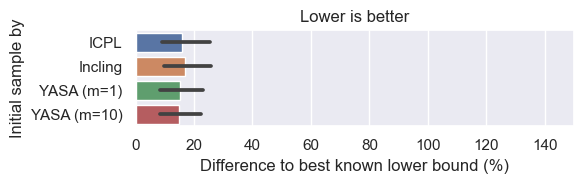

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from _conf import PLOT_INITIAL_SAMPLE_COMPARISON, PLOT_WIDTH

sns.set_theme()
f, ax = plt.subplots(figsize=(PLOT_WIDTH, 2))
plt.title("Lower is better")
sns.barplot(
    data=samplns_data[samplns_data["instance_name"].isin(solved_by_all)]
    .groupby(["initial_sample_name", "instance_name"])[["gap"]]
    .mean()
    .reset_index(),
    y="initial_sample_name",
    x="gap",
    ax=ax,
)
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Initial sample by")
plt.xlim(0, 150)
plt.tight_layout()
plt.savefig(PLOT_INITIAL_SAMPLE_COMPARISON)
plt.show()

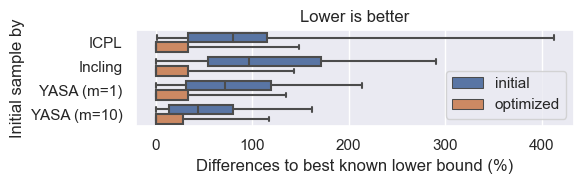

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from _conf import PLOT_INITIAL_SAMPLE_COMPARISON_BOXPLOT, PLOT_WIDTH

sns.set_theme()
f, ax = plt.subplots(figsize=(PLOT_WIDTH, 2))
plt.title("Lower is better")
t = (
    samplns_data[samplns_data["instance_name"].isin(solved_by_all)]
    .groupby(["initial_sample_name", "instance_name"])[["gap"]]
    .mean()
    .reset_index()
)
t["state"] = "optimized"
t_ = (
    samplns_data[samplns_data["instance_name"].isin(solved_by_all)]
    .groupby(["initial_sample_name", "instance_name"])[["baseline_gap"]]
    .mean()
    .rename(columns={"baseline_gap": "gap"})
    .reset_index()
)
t_["state"] = "initial"
t = pd.concat([t_, t])
sns.boxplot(
    data=t,
    y="initial_sample_name",
    x="gap",
    ax=ax,
    hue="state",
    whis=(0, 100)
    # medianprops={"linewidth": 2.0}
)
plt.legend(loc="lower right")
plt.xlabel("Differences to best known lower bound (%)")
plt.ylabel("Initial sample by")
# plt.xlim(0, 150)
plt.tight_layout()
plt.savefig(PLOT_INITIAL_SAMPLE_COMPARISON_BOXPLOT)
plt.show()

In [23]:
samplns_data[samplns_data["instance_name"].isin(solved_by_all)].groupby(
    ["initial_sample_name", "instance_name"]
)[["gap"]].mean().reset_index().groupby("initial_sample_name")[["gap"]].quantile(0.75)

,gap
initial_sample_name,
ICPL,33.939394
Incling,33.333333
YASA (m=1),33.333333
YASA (m=10),28.235294


In [13]:
t = (
    samplns_data[samplns_data["instance_name"].isin(solved_by_all)]
    .groupby(["initial_sample_name", "instance_name"])[["gap"]]
    .mean()
    .reset_index()
)
(
    t.groupby(["instance_name"])[["gap"]].max()
    - t.groupby(["instance_name"])[["gap"]].min()
)

,gap
instance_name,
APL,0.000000
APL-Model,0.000000
BankingSoftware,0.000000
BattleofTanks,4.296875
ChatClient,0.000000
DMIE,0.000000
E-Shop,6.666667
EMBToolkit,19.754274
FameDB,0.000000


In [14]:
t = (
    samplns_data[samplns_data["instance_name"].isin(solved_by_all)]
    .groupby(["initial_sample_name", "instance_name"])[["gap"]]
    .mean()
    .reset_index()
)
t[t["instance_name"] == "FreeBSD-8_0_0"]

,initial_sample_name,instance_name,gap
10,ICPL,FreeBSD-8_0_0,148.965517
55,Incling,FreeBSD-8_0_0,143.448276
100,YASA (m=1),FreeBSD-8_0_0,135.172414
145,YASA (m=10),FreeBSD-8_0_0,117.931034


In [15]:
# average absolute difference of the solution gaps
(
    t.groupby(["instance_name"])[["gap"]].max()
    - t.groupby(["instance_name"])[["gap"]].min()
).mean()

gap    3.051586
dtype: float64

In [16]:
samplns_data[samplns_data["instance_name"].isin(solved_by_all)].groupby(
    ["initial_sample_name", "instance_name"]
)[["gap"]].mean().reset_index().groupby(["initial_sample_name"])[["gap"]].mean()

,gap
initial_sample_name,
ICPL,16.026885
Incling,16.861322
YASA (m=1),15.052907
YASA (m=10),14.880951
